# 4. Machine Learning with R

sk-learn과 비슷하나 홈페이지가 구리다... 

In [2]:
library(caret) # sklearn과 비슷하나 sklearn이 더 좋다. 
library(tidyverse)

## 데이터 준비 

In [3]:
df <- read_csv("automobile.csv") # RStudio에서 tibble은 화면크기에 맞게 데이터가 출력된다. jupyter 에서 전체 출력. 

Parsed with column specification:
cols(
  .default = col_character(),
  symboling = col_integer(),
  normalized_losses = col_integer(),
  wheel_base = col_double(),
  length = col_double(),
  width = col_double(),
  height = col_double(),
  curb_weight = col_integer(),
  engine_size = col_integer(),
  bore = col_double(),
  stroke = col_double(),
  compression_ratio = col_double(),
  horsepower = col_integer(),
  peak_rpm = col_integer(),
  city_mpg = col_integer(),
  highway_mpg = col_integer(),
  price = col_integer()
)
See spec(...) for full column specifications.


In [5]:
head(df)

,symboling,normalized_losses,maker,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
2,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8,115,5500,18,22,17450
3,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
4,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
5,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
6,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16925


# 선형 회귀분석
 - http://archive.ics.uci.edu/ml/   # 여기서 데이터를 가지고 올 수 있다. 

In [6]:
model <- lm(symboling ~ width, data=df)
summary(model)


Call:
lm(formula = symboling ~ width, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.52206 -0.81741  0.02148  1.02148  2.92097 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  9.54381    3.13049   3.049  0.00270 **
width       -0.13425    0.04769  -2.815  0.00551 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.168 on 157 degrees of freedom
Multiple R-squared:  0.04804,	Adjusted R-squared:  0.04198 
F-statistic: 7.923 on 1 and 157 DF,  p-value: 0.005506


In [8]:
options(repr.plot.height=3)

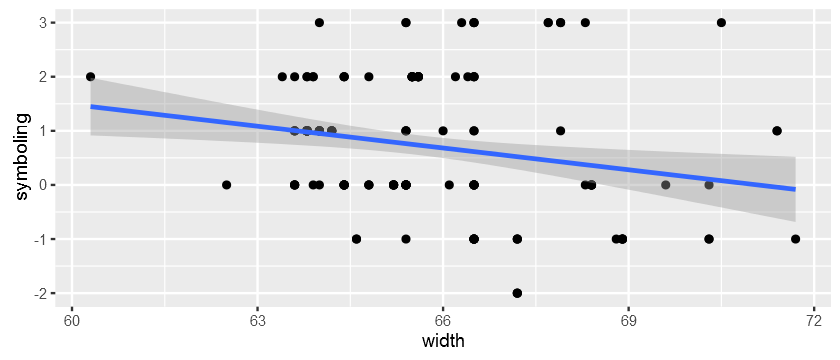

In [9]:
ggplot(df, aes(width, symboling)) + geom_point() + geom_smooth(method='lm')

In [10]:
symboling.p <- predict(model,df)
head(symboling.p)

1           2           3           4           5           6 
 0.65631092  0.62946047 -0.04180087 -0.04180087  0.84426410  0.84426410

 - 선형회귀는 많이해서 생략. 

## 통계 vs Machine Learning 
 - 차이 : 통계는 해석이 필요하고 한데, ML은 맞추기만 하면된다.
 - 통계는 해석 ML는 예측 해석은 다양하게 가능하지만 예측은 설명이 불가능하다. 왜 이렇게 된다정도만 되지 정확히 표현이 불가
 - 조절(Moderation)
  - overfitting, Underfitting 
  - 전체 데이터 중 일부를 짤라낸다. Split (Training : 70%, Test : 30%) -> Trianing 후 Test overfitting을 막을 수 있다.
 - 시기에 따라 데이터가 나타나 있다면 1~12월 : 1~10월까지만 Train하고 11~12 : Test 데이터로 활용. 
 - 어떠한 특성을 가지는가. 시즈널리티 일경우 전체에서 나누는게 나음.

## Data partitioning 

In [11]:
index <- createDataPartition(y = df$symboling, p=0.6, times = 1, list = F)

In [12]:
train <- df[index,]
test <- df[-index,]

In [13]:
dim(train)
dim(test)

[1] 97 26

[1] 62 26

In [14]:
mean((train$symboling-predict(model,train))^2)

[1] 1.461025

In [15]:
mean((test$symboling-predict(model,test))^2)

[1] 1.167439

## 변수선택
 - 머신러닝 할 수 없는 변수 : Example(너무 적은 카테고리 수동으로 제거 )

In [16]:
colnames(df)

[1] "symboling"         "normalized_losses" "maker"            
 [4] "fuel"              "aspiration"        "doors"            
 [7] "body"              "wheels"            "engine_location"  
[10] "wheel_base"        "length"            "width"            
[13] "height"            "curb_weight"       "engine_type"      
[16] "cylinders"         "engine_size"       "fuel_system"      
[19] "bore"              "stroke"            "compression_ratio"
[22] "horsepower"        "peak_rpm"          "city_mpg"         
[25] "highway_mpg"       "price"

In [17]:
features = c("symboling", "fuel", "aspiration", "doors", "body", "wheels", "wheel_base",
             "length", "width", "height", "curb_weight", "engine_size",
             "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
             "city_mpg", "highway_mpg", "price")

train = df[index, features]
test = df[-index, features]

## Hyper Parameter 
 - 데이터를 조정하는 값이 아니라, 먼저 지정해야되는 Parameters  기준이 없다. CrossValidation
 - Training Data 를 또 70 : 30 으로 Train / Test로 나눠서 반복해본다. Tuning Parameter를 이런식으로 잡는다. 
 - Test와 하는 일은 비슷하나 목적이 다르다. 

## k-fold Cross Vaildation 
 - 3-fold : 데이터를 3개로 나눈다 1,2 번으로 Training 3번으로 Vaildation, 1,3으로 Training 2번으로 vaildation 
 - repeation을 할 수 있다. 또 랜덤하게 반복할 수 있다. 

## Python에서는 GridSearchcv 가 동일한 역할.
 - http://scikit-learn.org/stable/modules/grid_search.html#grid-search
 - http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV


In [19]:
# Training Control
controlObject <- trainControl(
  method = 'repeatedcv',
  repeats = 1, #나누는 걸 몇번
  number = 5) # 5등분

## LM의 정규화 (11월 12일 파이썬 수업 )
 - 미친듯이 널뛰는 선보다는 선형 모델 (직선) 이 좋다.
 - 회귀 선도 평평하게 줄인다.
 - |W| 의 최소화 : Lasso(L1)  |W|^2의 최소화 : Ridge(L2)
 - Lasso : 회귀계수를 0으로 만드는 성향이 있다.
 - 변수 선택의 기능이 있다.
 - Ridge : 예측력이 조금 더 좋다. (항상 그런 것은 아니다.)
 
### 영화평에 대한 감정 분석 
 - 어제 / 잼있다 / 귀신   => 어제 0.00001 계수가 있다 Lasso를 사용하게 되면 0으로 변한다. 

# 1. Elastic Net
 - L1 + L2도 하자. 
 - 튜닝파라미터 
  - 람다 : 정규화를 얼마나 강하게 할 것이냐? 높으면 정규화가 높다.  (모델이 단순하게) 적게 하면 예측률이 높아질듯.
  - 알파 : L1,L2를 몇대 몇으로 할것이냐. 0~1, 알파 : 0 릿지만, 알파 : 1 라쏘만.

In [20]:
# 모든 경우의 수를 만든다. 
elst.Grid <- expand.grid(
  .alpha = seq(0, 1, 0.2),
  .lambda = c(0.001, 0.01, 0.1))

In [22]:
t(elst.Grid)

.alpha,0.0,0.2,0.4,0.6,0.8,1.0,0.0,0.2,0.4,0.6,0.8,1.0,0.0,0.2,0.4,0.6,0.8,1.0
.lambda,0.001,0.001,0.001,0.001,0.001,0.001,0.010,0.010,0.010,0.010,0.010,0.010,0.100,0.100,0.100,0.100,0.100,0.100


### train : Carat 의 function 

In [26]:
library(glmnet)

In [25]:
elst.Model <- train(
  symboling ~ ., 
  data = train, 
  method = 'glmnet',
  tuneGrid = elst.Grid, # 만든 파라미터.
  preProc = c('center', 'scale'), # 무조건 넣는다고 생각하면된다. 
  metric = 'RMSE', #예측문제라 RMSE를 최적화
  trControl = controlObject) #CrossValidation을 어떻게 할 것인가. 

#RMSE가 작은걸 고르면 된다. 

In [27]:
elst.Model

glmnet 

97 samples
19 predictors

Pre-processing: centered (23), scaled (23) 
Resampling: Cross-Validated (5 fold, repeated 1 times) 
Summary of sample sizes: 79, 77, 77, 77, 78 
Resampling results across tuning parameters:

  alpha  lambda  RMSE       Rsquared 
  0.0    0.001   0.9320600  0.4331651
  0.0    0.010   0.9320600  0.4331651
  0.0    0.100   0.9311048  0.4340483
  0.2    0.001   0.9874712  0.4328352
  0.2    0.010   0.9412794  0.4434973
  0.2    0.100   0.9190501  0.4524092
  0.4    0.001   0.9854245  0.4342221
  0.4    0.010   0.9278546  0.4547892
  0.4    0.100   0.9271350  0.4469048
  0.6    0.001   0.9836551  0.4353357
  0.6    0.010   0.9150330  0.4654072
  0.6    0.100   0.9252666  0.4500723
  0.8    0.001   0.9821144  0.4364836
  0.8    0.010   0.9040952  0.4759159
  0.8    0.100   0.9310559  0.4459493
  1.0    0.001   0.9805805  0.4376278
  1.0    0.010   0.8913034  0.4876718
  1.0    0.100   0.9338534  0.4431687

RMSE was used to select the optimal model using  th

In [28]:
best = as.numeric(rownames(elst.Model$bestTune))
best

[1] 17

In [29]:
elst.Model$finalModel$beta[,best] # 베스트의 회귀계수

fuelgas   aspirationturbo          doorstwo       bodyhardtop 
      0.000000000       0.000000000       0.483066087       0.000000000 
    bodyhatchback         bodysedan         bodywagon         wheelsfwd 
      0.000000000       0.000000000      -0.005026577       0.000000000 
        wheelsrwd        wheel_base            length             width 
      0.000000000      -0.170539911       0.000000000       0.000000000 
           height       curb_weight       engine_size              bore 
     -0.100766815       0.000000000       0.000000000       0.000000000 
           stroke compression_ratio        horsepower          peak_rpm 
      0.000000000       0.000000000       0.000000000       0.000000000 
         city_mpg       highway_mpg             price 
      0.000000000       0.000000000       0.000000000

In [30]:
y = predict(elst.Model, test, na.action = na.pass)
mean((test$symboling - y)^2, na.rm = T)

[1] 0.5677897

# 2. K-Nearset Neightbors(KNN)
 - KNN -> 친구를 보면 그사람을 안다 라는 발상
 - 새로운 데이터의 가장 가까운 데이터를 보고 판단한다. k < 갯수. 즉, 친구를 여러명 본다. k=3 이면 3개의 친구를 본다
 - 데이터 적을 때 k를 키우면 도움이 안된다. 하지만 데이터가 많아도 재앙이다. 비용이 많이든다. <br> 100만건에서 10개를 검색하는데 시간이 많이 걸린다. 
 - 예측하는데 시간이 많이 걸린다. 트레이닝 할때는 시간이 얼마 안걸리는데, 테스트할때 많이 걸린다. 
 - 추천시스템에서 KNN 많이 쓴다. 
 - 가정 : 비슷한 애들끼리 모여있다. 하지만 모형확인부터 해야된다.  
  - 막 섞여있다. 하면 KNN을 하기 어렵다. But 다른 모델도 마찬가지다. 
 - 주변의 값의 평균으로 한다. k=3 이면 3개의 평균. 
 - 비슷하다는 것은 어떻게 할 것이냐? 예) 변수가 3개다. 가격(0~10,000,000) / 크기 (0~10) 어느것이 가까우냐 판단하기 어렵다.
  - 변수가 달라지면 판단이 어렵다. center와 scale  연속변수면 이렇게 하면 된다.  
  - 이산변수면 더 골아프다. => 유사성을 본인이 정의. 예를들어 svm 커널처럼 비슷한거 갯수를 Count 
  - 또는 재정의 : 현대차 / 토요타 / 마세라티 연속적인 수치로 변환.  다른지표로 변환 평균 가격 과같은 숫자로 
 - 회사의 데이터는 대부분이 이산변수이다.... 

In [32]:
knn.Model <- train(
  symboling ~ ., 
  data = train,
  method = 'knn',
  preProc = c('center', 'scale'),
  metric = 'RMSE',
  tuneGrid = data.frame(.k = 2:5), # 2~5개 k 개 
  trControl = controlObject)

In [33]:
knn.Model

k-Nearest Neighbors 

97 samples
19 predictors

Pre-processing: centered (23), scaled (23) 
Resampling: Cross-Validated (5 fold, repeated 1 times) 
Summary of sample sizes: 78, 78, 76, 79, 77 
Resampling results across tuning parameters:

  k  RMSE       Rsquared 
  2  0.7970267  0.5899948
  3  0.7789668  0.6066219
  4  0.8169673  0.5690416
  5  0.8234593  0.5767483

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was k = 3. 

In [34]:
test.c = test[complete.cases(test),]
y = predict(knn.Model, test.c)  # 주변의 값의 평균으로 한다. k=3 이면 3개의 평균. 
mean((test.c$symboling - y)^2, na.rm = T)

[1] 0.6972446

# 3. SVM
 - LM은 오차를 줄이는데 목적이 있다
 - SVM은 좋은 형태를 찾는데 목적이 있다. 
 - Classification : 무수히 많은 경계선을 그을 수가 있다. Large Margin Classifier 의 일종이다.(SVM)
 - Regression : 가장 평평한 선을 찾는다 (일정범위내에서)
 - 예외케이스에서는 Penalty를 먹인다. 
 - Kernal Trick (SVM 수업참고.)
 - example : 이산변수 -> 유사성으로 변경 

In [35]:
library(kernlab)

Warning message:
: package 'kernlab' was built under R version 3.3.2
Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



In [36]:
sigmaRange <- sigest(as.matrix(train[8:20])) # sigma range를 추천해준다. 연속인 값에 넣어준다. 
svm.Grid <- expand.grid(
  .sigma = sigmaRange[1],
  .C = 2^(seq(-5,5,2)))

svm.Model <- train(
  symboling ~ .,
  data = train,
  method = 'svmRadial', # svm with rbf
  tuneGrid = svm.Grid,
  preProc = c('center', 'scale'),
  metric = 'RMSE',    
  trControl = controlObject)


In [37]:
y = predict(svm.Model, test)
mean((test.c$symboling - y)^2)

[1] 0.5606975

# 4. Nueral Net
 - 별로 좋지가 않아 사용하지 않기를 권한다. 
 - DeepLearning과 동일하다 생각하면된다. 
 - Perceptron = Logistic Regression

In [38]:
nnet.Grid <- expand.grid(
  .decay = c(0.001, 0.01, 0.1), # LM의 ridge와 동일하다. 람다를 키우를거랑 비슷하다. 정규화를 얼마나 할 것이냐.
  .size = seq(3,11, by = 2), # hidden Layer 크기 노드의 수 
  .bag = FALSE) # bagging 모델을 여러개 만들어서 각각 다른 데이터를 줘서 평균 내는 방식. 

nnet.Model <- train(
  symboling ~ .,
  data = train,
  method = 'avNNet',
  tuneGrid = nnet.Grid,
  preProc = c('center', 'scale'),
  maxit = 200, # 밑바닥에 들어가서 error가 주는것인지 아닌지 알수가 없다. 한참걸린다. local minimun 최대 200 Step을 내려가고 Stop
  trControl = controlObject
  ,trace = F)


Loading required package: nnet
Warning message:
: package 'nnet' was built under R version 3.3.2Warning message:
: executing %dopar% sequentially: no parallel backend registered

In [39]:
y = predict(nnet.Model, test)
mean((test.c$symboling - y)^2)

[1] 0.7568012

# 5.Decision Tree

In [40]:
rpart.Model <- train(
  symboling ~ ., 
  data = train,
  method = 'rpart',
  tuneLength = 10,
  trControl = controlObject)

rpart.Model


Loading required package: rpart
Warning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.

CART 

97 samples
19 predictors

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 1 times) 
Summary of sample sizes: 77, 78, 76, 78, 79 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared 
  0.00000000  0.7317461  0.6466811
  0.04476486  0.7571485  0.6166751
  0.08952972  0.8035704  0.5649615
  0.13429457  0.8014913  0.5693026
  0.17905943  0.9436526  0.4318178
  0.22382429  0.9556323  0.4085557
  0.26858915  0.9556323  0.4085557
  0.31335401  0.9556323  0.4085557
  0.35811886  0.9556323  0.4085557
  0.40288372  1.1588788  0.2932859

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was cp = 0. 

In [41]:
y = predict(rpart.Model, test)
mean((test.c$symboling - y)^2)

[1] 0.7619336

# 6. RandomForest 
 - bagging을 적용  python 수업시간 내용을 본다. 
 - feature importance 를 사용해서 설명이 가능하다. 

In [42]:
rf.Grid <- expand.grid(.mtry = c(4,6,8,10)) # 컬럼수를 결정 총 length 만큼 반복하는데 각 순서대로 컬럼수를 가지고 한다. 
rf.Model <- train(
  symboling  ~.,
  data = train,
  method = 'rf',
  tuneGrid = rf.Grid,
  ntrees = 10, # 트리 수 
  importance = T,
  trControl = controlObject)


Loading required package: randomForest
Warning message:
: package 'randomForest' was built under R version 3.3.2randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [43]:
y = predict(rf.Model, test)
mean((test.c$symboling - y)^2)

[1] 0.3522052

# 7. Gradient Boosting Tree
 - Y = Y^hat + E 실제 = 예측 + 오차 
 - 실제 = 예측1 + 오차1 
  - 오차1 = 예측2 + 오차2 
  - 실제 = 예측1 + 예측2 + 오차2 
  - 실제 = 예측1 + 예측2 + 예측3 + 오차3 으로 점점 늘어난다. 
 - 첫번째 모형이 예측하는데 그게 못하는 것을 두번째 모형이 한다. 

# Evaluation between model

In [44]:
allResamples <- resamples(
  list('Elastic Net' = elst.Model,
       'K-NN' = knn.Model,
       'svm' = svm.Model,
       'Neural network' = nnet.Model,
       'tree' = rpart.Model,
       'Random Forest' = rf.Model))
summary(allResamples)


Call:
summary.resamples(object = allResamples)

Models: Elastic Net, K-NN, svm, Neural network, tree, Random Forest 
Number of resamples: 5 

RMSE 
                 Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
Elastic Net    0.5839  0.9012 0.9327 0.8913  0.9499 1.0890    0
K-NN           0.6186  0.7071 0.8447 0.7790  0.8516 0.8729    0
svm            0.5993  0.8880 0.9387 0.8647  0.9431 0.9543    0
Neural network 0.8866  0.9993 1.0000 1.0360  1.0300 1.2650    0
tree           0.5677  0.6240 0.7117 0.7317  0.8437 0.9116    0
Random Forest  0.5713  0.5875 0.6749 0.6884  0.7557 0.8525    0

Rsquared 
                 Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
Elastic Net    0.3647  0.3706 0.4153 0.4877  0.5159 0.7718    0
K-NN           0.4810  0.5465 0.5473 0.6066  0.7135 0.7448    0
svm            0.3850  0.4118 0.5690 0.5302  0.5793 0.7057    0
Neural network 0.1792  0.2030 0.3781 0.3686  0.4909 0.5916    0
tree           0.4196  0.5687 0.6994 0.6467  0.7363 0.8095    0
Random F

# save & load

In [45]:
save(rf.Model, file="rfModel.RData")
load('rfModel.RData')

# Linear Discriminant Analysis

In [46]:
library(e1071)

Warning message:
: package 'e1071' was built under R version 3.3.2

In [47]:
df$doors <- factor(df$doors)
levels(df$doors)

[1] "four" "two"

In [48]:
lda.Model <- train(
  doors ~ ., 
  data = train,
  method = 'lda2',
  metric = 'Kappa',
  tuneLength = 2,
  trControl = controlObject)

lda.Model

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Warning message:
In lda.default(x, grouping, ...): variables are collinear

Linear Discriminant Analysis 

97 samples
19 predictors
 2 classes: 'four', 'two' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 1 times) 
Summary of sample sizes: 78, 77, 78, 77, 78 
Resampling results:

  Accuracy   Kappa    
  0.8768421  0.7363044

Tuning parameter 'dimen' was held constant at a value of 1
 

In [49]:
y = predict(lda.Model, test.c)
confusionMatrix(y, test.c$doors)

Confusion Matrix and Statistics

          Reference
Prediction four two
      four   34   7
      two     1  20
                                          
               Accuracy : 0.871           
                 95% CI : (0.7615, 0.9426)
    No Information Rate : 0.5645          
    P-Value [Acc > NIR] : 2.085e-07       
                                          
                  Kappa : 0.7307          
 Mcnemar's Test P-Value : 0.0771          
                                          
            Sensitivity : 0.9714          
            Specificity : 0.7407          
         Pos Pred Value : 0.8293          
         Neg Pred Value : 0.9524          
             Prevalence : 0.5645          
         Detection Rate : 0.5484          
   Detection Prevalence : 0.6613          
      Balanced Accuracy : 0.8561          
                                          
       'Positive' Class : four            
                                          